<a href="https://colab.research.google.com/github/aliimronf2/pacd-assignments/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook ini disusun oleh Ali Imron Filayaty Faqih untuk memenuhi tugas 1st Assignment.

Notebook ini membahas metode _downsampling_ dan _upsampling_ dengan menyertakan dua bagian:
- Teori yang diambil dari referensi.
- Kode Python untuk memberikan demonstrasi program dari kedua metode tersebut untuk array 2D versi grayscale.

Input dari setiap program adalah Numpy array 2D versi grayscale dalam ukuran yang dianggap 8-bit.
Output dapat berupa array 2D atau grafik yang dibuat dengan library matplotlib.

# Downsampling

## Teori Downsampling

Ada tiga metode untuk melakukan downsampling pada citra, antara lain:
- Max pooling, yaitu mengambil nilai maksimum dari setiap sub-matriks (patch)
- Mean pooling, yaitu mengambil rata-rata dari setiap sub-matriks (patch)
- Median pooling, yaitu mengambil median dari setiap sub-matriks (patch)

**Rumus ukuran output pada downsampling**

Citra berukuran $H\times W$, jika di-_downsampling_ dengan kernel berukuran $k\times k$, stride $s$ dan padding $p$, akan menghasilkan output berukuran
$$\text{out}_h = \left\lfloor \frac{H-k+2p}{s}\right\rfloor + 1$$
$$\text{out}_w = \left\lfloor \frac{W-k+2p}{s}\right\rfloor + 1$$

Keterangan:
- kernel: matriks kecil yang digeser melintasi citra
- stride: langkah pergeseran patch (sub-matriks) di sepanjang baris dan kolom.
- padding: menambah baris atau kolom ekstra, agar ukuran matriks pas dengan kernel dan stride

**Contoh:**

Diberikan block pixel sebagai berikut:
<center>
<table>
    <tr><td>76</td><td>124</td><td>244</td><td>180</td></tr>
    <tr><td>60</td><td>72</td><td>92</td><td>108</td></tr>
    <tr><td>24</td><td>98</td><td>130</td><td>126</td></tr>
    <tr><td>80</td><td>235</td><td>112</td><td>142</td></tr>
</table>
</center>

Block di atas dibagi menjadi 4 sub-matriks berukuran 2x2, dengan kernel 2 dan stride 2, diperoleh output dengan ukuran
$$\text{tinggi} = \text{out}_h = \left\lfloor \frac{4-2}{2} \right\rfloor + 1 = 2$$
$$\text{lebar} = \text{out}_w = \left\lfloor \frac{4-2}{2} \right\rfloor + 1 = 2$$

Dengan demikian, matriks di atas dibagi menjadi

- Patch A:
  <center>
  <table>
      <tr><td>76</td><td>124</td></tr>
      <tr><td>60</td><td>72</td></tr>
  </table>
  </center>

- Patch B:
  <center>
  <table>
      <tr><td>244</td><td>180</td></tr>
      <tr><td>92</td><td>108</td></tr>
  </table>
  </center>

- Patch C:
  <center>
  <table>
      <tr><td>24</td><td>98</td></tr>
      <tr><td>80</td><td>235</td></tr>
  </table>
  </center>

- Patch D:
  <center>
  <table>
      <tr><td>130</td><td>126</td></tr>
      <tr><td>112</td><td>142</td></tr>
  </table>
  </center>

## Contoh Downsampling dengan Max Pooling

Max pooling memilih nilai maksimum dari setiap sub-matriks (patch) pada contoh di atas, sebagai berikut:

- Dari patch A,
    <table>
        <tr><td>76</td><td>124</td></tr>
        <tr><td>60</td><td>72</td></tr>
    </table>

    diperoleh nilai maksimum 124.

- Dari patch B,
    <table>
        <tr><td>244</td><td>180</td></tr>
        <tr><td>92</td><td>108</td></tr>
    </table>

    diperoleh nilai maksimum 244.

- Dari patch C,
    <table>
        <tr><td>24</td><td>98</td></tr>
        <tr><td>80</td><td>235</td></tr>
    </table>

    diperoleh nilai maksimum 235.

- dari patch D,
    <table>
        <tr><td>130</td><td>126</td></tr>
        <tr><td>112</td><td>142</td></tr>
    </table>

    diperoleh nilai maksimum 142.
  

Dengan demikian, diperoleh citra hasil downsampling dengan max pooling adalah
<center>
    <table>
        <tr><td>124</td><td>244</td></tr>
        <tr><td>235</td><td>142</td></tr>
    </table>
</center>

## Implementasi Max Pooling dengan Program Python

Pada program di bawah ini, digunakan library numpy untuk menuliskan array 2D beserta fungsi aggregat seperti max, mean, dan median.

In [201]:
import numpy as np

def downsampling_max(img, target_h, target_w):
    '''
    Downsampling 2D untuk array 2D (grayscale) menggunakan max pooling
    - img: np.ndarray shape (height, width)
    - target_h: tinggi citra hasil downsampling
    - target_w: lebar citra hasil downsampling
    '''
    H, W = img.shape
    out = np.zeros((target_h, target_w), dtype=np.float64)

    h_block = H / target_h
    w_block = W / target_w

    for i in range(target_h):
        for j in range(target_w):
            row_start = int(i * h_block)
            row_end   = int((i + 1) * h_block)
            col_start = int(j * w_block)
            col_end   = int((j + 1) * w_block)
            patch = img[row_start:row_end, col_start:col_end]

            out[i, j] = np.max(patch)

    return out.astype(np.uint8)

In [202]:
# Contoh penggunaan dengan matriks yang diberikan di atas
X4 = np.array([
    [ 76, 124, 244, 180],
    [ 60,  72,  92, 108],
    [ 24,  98, 130, 126],
    [ 80, 235, 112, 142]
], dtype=np.float64)

down_max = downsampling_max(X4, 2, 2)

In [203]:
print("Hasil downsampling dengan max pooling adalah\n", down_max)

Hasil downsampling dengan max pooling adalah
 [[124 244]
 [235 142]]


**Visualisasi dengan matplotlib**

Berikut visualisasi dari citra asli dengan citra hasil downsampling:

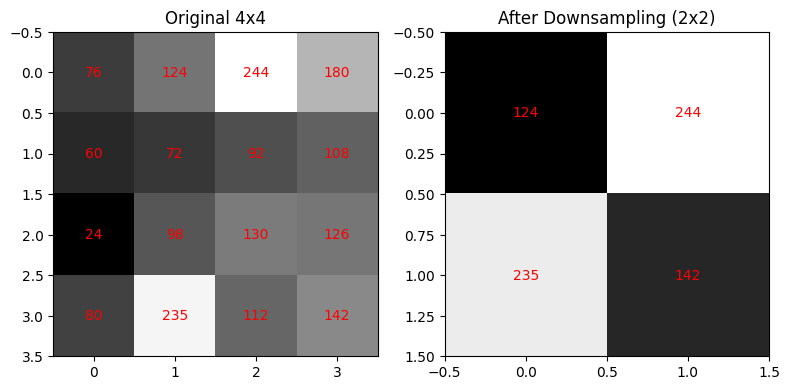

In [204]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(X4, cmap="gray", interpolation="nearest")
axs[0].set_title("Original 4x4")
for (i, j), val in np.ndenumerate(X):
    axs[0].text(j, i, int(val), ha="center", va="center", color="red")

axs[1].imshow(down_max, cmap="gray", interpolation="nearest")
axs[1].set_title("After Downsampling (2x2)")
for (i, j), val in np.ndenumerate(down_max):
    axs[1].text(j, i, int(val), ha="center", va="center", color="red")

plt.tight_layout()
plt.show()

## Downsampling Max Pooling & Quantization

Pada program di bawah ini, ditunjukkan downsampling dengan max pooling yang dilanjutkan dengan quantization untuk 2-bit, 4-bit, dan 8-bit.

In [205]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def downsampling_max(img, target_h, target_w):
    '''
    Downsampling 2D untuk array 2D (grayscale) menggunakan max pooling
    - img: np.ndarray shape (height, width)
    - target_h: tinggi citra hasil downsampling
    - target_w: lebar citra hasil downsampling
    '''
    H, W = img.shape
    out = np.zeros((target_h, target_w), dtype=np.float64)

    h_block = H / target_h
    w_block = W / target_w

    for i in range(target_h):
        for j in range(target_w):
            row_start = int(i * h_block)
            row_end   = int((i + 1) * h_block)
            col_start = int(j * w_block)
            col_end   = int((j + 1) * w_block)
            patch = img[row_start:row_end, col_start:col_end]

            out[i, j] = np.max(patch)

    return out.astype(np.uint8)

def quantize_index(img, out_bit=2):
    """
    Kuantisasi gambar ke indeks level (0 .. 2^out_bit - 1)
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()
    # Normalisasi
    norm = (img - img_min) / (img_max - img_min)

    q_index = np.round(norm * (levels - 1)).astype(int)
    return np.clip(q_index, 0, levels-1)

def quantize_image_gray(img, out_bit=8):
    """
    Kuantisasi grayscale ke n-bit dengan normalisasi min-max
    - img: array (float atau int)
    - out_bit: jumlah bit (misal 2, 4, 8)

    Hasil akhir dalam bentuk nilai intensitas (0..255).
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()

    # Normalisasi ke [0,1]
    norm = (img - img_min) / (img_max - img_min)

    # Mapping ke level [0..levels-1]
    idx = np.round(norm * (levels - 1))

    # Skala balik ke [0..255]
    step = 255 / (levels - 1)
    q_img = (idx * step).astype(np.uint8)

    return q_img

In [206]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.float64)

# 1) Downsampling (max pooling)
down_max = downsampling_max(X4, 2, 2)

# 2) Kuantisasi versi index level
down_max_q2_idx = quantize_index(down_max, out_bit=2)
down_max_q4_idx = quantize_index(down_max, out_bit=4)
down_max_q8_idx = quantize_index(down_max, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
down_max_q2 = quantize_image_gray(down_max, out_bit=2)
down_max_q4 = quantize_image_gray(down_max, out_bit=4)
down_max_q8 = quantize_image_gray(down_max, out_bit=8)

print("Hasil downsampling max pooling:\n", down_max)
print("2-bit index (0-3):\n", down_max_q2_idx)
print("4-bit index (0-15):\n", down_max_q4_idx)
print("8-bit index (0-255):\n", down_max_q8_idx)
print("\nKuantisasi 2-bit:\n", down_max_q2)
print("\nKuantisasi 4-bit:\n", down_max_q4)
print("\nKuantisasi 8-bit:\n", down_max_q8)

Hasil downsampling max pooling:
 [[124 244]
 [235 142]]
2-bit index (0-3):
 [[0 3]
 [3 0]]
4-bit index (0-15):
 [[ 0 15]
 [14  2]]
8-bit index (0-255):
 [[  0 255]
 [236  38]]

Kuantisasi 2-bit:
 [[  0 255]
 [255   0]]

Kuantisasi 4-bit:
 [[  0 255]
 [238  34]]

Kuantisasi 8-bit:
 [[  0 255]
 [236  38]]


**Visualisasi**

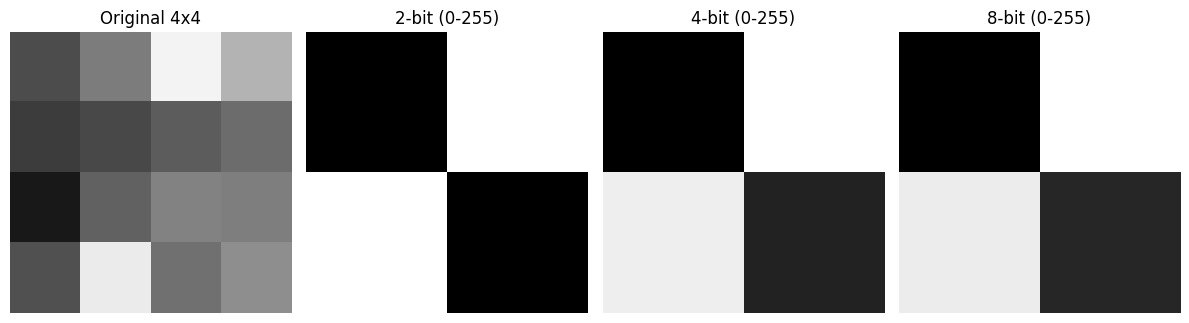

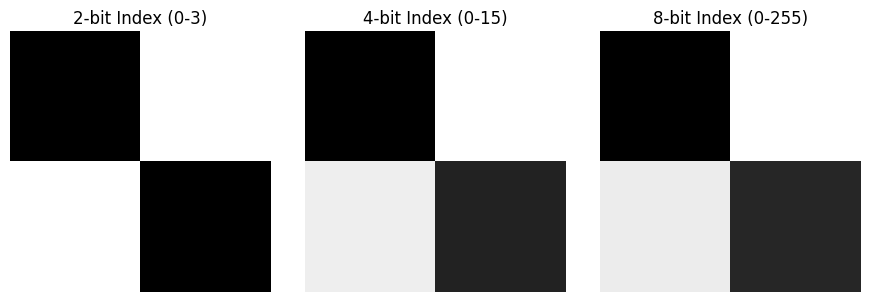

In [207]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(down_max_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(down_max_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(down_max_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(down_max_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(down_max_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(down_max_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

---

## Contoh Downsampling dengan Mean Pooling

Mean pooling memilih rata-rata dari setiap patch di atas.

- Dari patch A,
    <table>
        <tr><td>76</td><td>124</td></tr>
        <tr><td>60</td><td>72</td></tr>
    </table>

  diperoleh mean
  $$\frac{76+124+60+72}{4} = 83$$

- Dari patch B,
    <table>
        <tr><td>244</td><td>180</td></tr>
        <tr><td>92</td><td>108</td></tr>
    </table>

  diperoleh mean

  $$
  \frac{244+180+92+108}{4} = 156
  $$

- Dari patch C,
    <table>
        <tr><td>24</td><td>98</td></tr>
        <tr><td>80</td><td>235</td></tr>
    </table>

  diperoleh mean

  $$
  \frac{24+98+80+235}{4} = 109,25
  $$

  yang dibulatkan menjadi 109.

- Dari patch D,
    <table>
        <tr><td>130</td><td>126</td></tr>
        <tr><td>112</td><td>142</td></tr>
    </table>

  diperoleh mean

  $$\frac{130+126+112+142}{4} = 127.5$$

  yang dibulatkan menjadi 128.

Dengan demikian, diperoleh citra hasil downsampling dengan mean pooling adalah
<center>
  <table>
      <tr><td>83</td><td>156</td></tr>
      <tr><td>109</td><td>128</td></tr>
  </table>
</center>

## Implementasi Mean Pooling dengan Program Python

In [208]:
import numpy as np

def downsampling_mean(img, target_h, target_w):
    '''
    Downsampling 2D untuk array 2D (grayscale) menggunakan mean pooling
    - img: np.ndarray shape (height, width)
    - target_h: tinggi citra hasil downsampling
    - target_w: lebar citra hasil downsampling
    '''
    H, W = img.shape
    out = np.zeros((target_h, target_w), dtype=np.float64)

    h_block = H / target_h
    w_block = W / target_w

    for i in range(target_h):
        for j in range(target_w):
            row_start = int(i * h_block)
            row_end   = int((i + 1) * h_block)
            col_start = int(j * w_block)
            col_end   = int((j + 1) * w_block)
            patch = img[row_start:row_end, col_start:col_end]

            out[i, j] = np.round(np.mean(patch))

    return out.astype(np.uint8)

In [209]:
# Contoh penggunaan dengan matriks yang diberikan di atas
X4 = np.array([
    [ 76, 124, 244, 180],
    [ 60,  72,  92, 108],
    [ 24,  98, 130, 126],
    [ 80, 235, 112, 142]
], dtype=np.float64)

down_mean = downsampling_mean(X4, 2, 2)

In [210]:
print("Hasil downsampling dengan mean pooling adalah\n", down_mean)

Hasil downsampling dengan mean pooling adalah
 [[ 83 156]
 [109 128]]


**Visualisasi dengan matplotlib**

Berikut visualisasi dari citra asli dengan citra hasil downsampling:

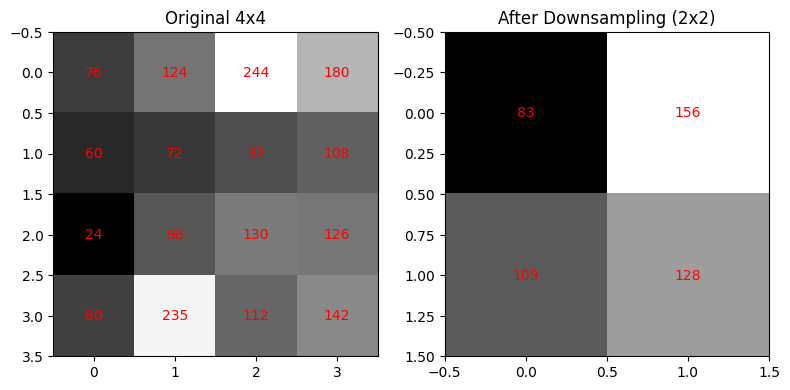

In [211]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(X4, cmap="gray", interpolation="nearest")
axs[0].set_title("Original 4x4")
for (i, j), val in np.ndenumerate(X):
    axs[0].text(j, i, int(val), ha="center", va="center", color="red")

axs[1].imshow(down_mean, cmap="gray", interpolation="nearest")
axs[1].set_title("After Downsampling (2x2)")
for (i, j), val in np.ndenumerate(down_mean):
    axs[1].text(j, i, int(val), ha="center", va="center", color="red")

plt.tight_layout()
plt.show()

## Downsampling dengan Mean Pooling & Quantization

Pada program di bawah ini, ditunjukkan downsampling dengan mean pooling yang dilanjutkan dengan quantization untuk 2-bit, 4-bit, dan 8-bit.

In [212]:
import numpy as np

def downsampling_mean(img, target_h, target_w):
    '''
    Downsampling 2D untuk array 2D (grayscale) menggunakan mean pooling
    - img: np.ndarray shape (height, width)
    - target_h: tinggi citra hasil downsampling
    - target_w: lebar citra hasil downsampling
    '''
    H, W = img.shape
    out = np.zeros((target_h, target_w), dtype=np.float64)

    h_block = H / target_h
    w_block = W / target_w

    for i in range(target_h):
        for j in range(target_w):
            row_start = int(i * h_block)
            row_end   = int((i + 1) * h_block)
            col_start = int(j * w_block)
            col_end   = int((j + 1) * w_block)
            patch = img[row_start:row_end, col_start:col_end]

            out[i, j] = np.round(np.mean(patch))

    return out.astype(np.uint8)

def quantize_index(img, out_bit=2):
    """
    Kuantisasi gambar ke indeks level (0 .. 2^out_bit - 1)
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()
    # Normalisasi
    norm = (img - img_min) / (img_max - img_min)

    q_index = np.round(norm * (levels - 1)).astype(int)
    return np.clip(q_index, 0, levels-1)

def quantize_image_gray(img, out_bit=8):
    """
    Kuantisasi grayscale ke n-bit dengan normalisasi min-max
    - img: array (float atau int)
    - out_bit: jumlah bit (misal 2, 4, 8)

    Hasil akhir dalam bentuk nilai intensitas (0..255).
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()

    # Normalisasi ke [0,1]
    norm = (img - img_min) / (img_max - img_min)

    # Mapping ke level [0..levels-1]
    idx = np.round(norm * (levels - 1))

    # Skala balik ke [0..255]
    step = 255 / (levels - 1)
    q_img = (idx * step).astype(np.uint8)

    return q_img

In [213]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.float64)

# 1) Downsampling (mean pooling)
down_mean = downsampling_mean(X4, 2, 2)

# 2) Kuantisasi versi index level
down_mean_q2_idx = quantize_index(down_mean, out_bit=2)
down_mean_q4_idx = quantize_index(down_mean, out_bit=4)
down_mean_q8_idx = quantize_index(down_mean, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
down_mean_q2 = quantize_image_gray(down_mean, out_bit=2)
down_mean_q4 = quantize_image_gray(down_mean, out_bit=4)
down_mean_q8 = quantize_image_gray(down_mean, out_bit=8)

print("Hasil downsampling mean pooling:\n", down_mean)
print("2-bit index (0-3):\n", down_mean_q2_idx)
print("4-bit index (0-15):\n", down_mean_q4_idx)
print("8-bit index (0-255):\n", down_mean_q8_idx)
print("\nKuantisasi 2-bit:\n", down_mean_q2)
print("\nKuantisasi 4-bit:\n", down_mean_q4)
print("\nKuantisasi 8-bit:\n", down_mean_q8)

Hasil downsampling mean pooling:
 [[ 83 156]
 [109 128]]
2-bit index (0-3):
 [[0 3]
 [1 2]]
4-bit index (0-15):
 [[ 0 15]
 [ 5  9]]
8-bit index (0-255):
 [[  0 255]
 [ 91 157]]

Kuantisasi 2-bit:
 [[  0 255]
 [ 85 170]]

Kuantisasi 4-bit:
 [[  0 255]
 [ 85 153]]

Kuantisasi 8-bit:
 [[  0 255]
 [ 91 157]]


**Visualisasi**

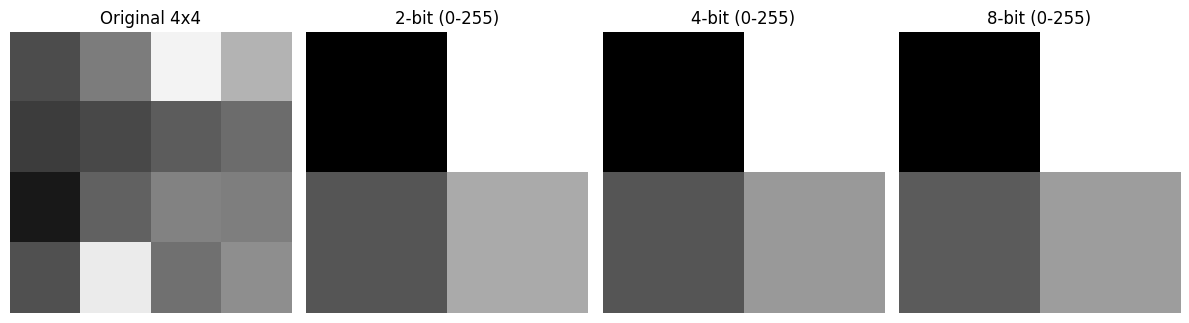

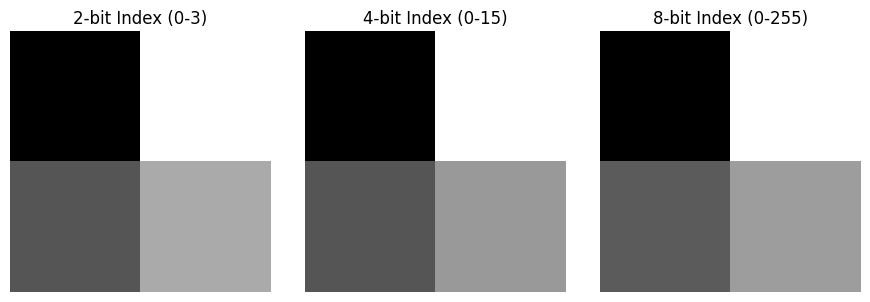

In [214]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(down_mean_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(down_mean_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(down_mean_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(down_mean_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(down_mean_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(down_mean_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

---

## Contoh Downsampling dengan Median Pooling

Median pooling menggunakan median dari setiap patch di atas.

- Dari patch A,
    <table>
        <tr><td>76</td><td>124</td></tr>
        <tr><td>60</td><td>72</td></tr>
    </table>

    diperoleh median 74.

- Dari patch B,
    <table>
        <tr><td>244</td><td>180</td></tr>
        <tr><td>92</td><td>108</td></tr>
    </table>

    diperoleh median 144.

- Dari patch C,
    <table>
        <tr><td>24</td><td>98</td></tr>
        <tr><td>80</td><td>235</td></tr>
    </table>

    diperoleh median 89.

- Dari patch D,
    <table>
        <tr><td>130</td><td>126</td></tr>
        <tr><td>112</td><td>142</td></tr>
    </table>

    diperoleh median 128.
  
Dengan demikian, diperoleh citra hasil downsampling dengan median pooling adalah
<center>
<table>
    <tr><td>74</td><td>144</td></tr>
    <tr><td>89</td><td>128</td></tr>
</table>
</center>

## Implementasi Median Pooling dengan Program Python

In [215]:
import numpy as np

def downsampling_median(img, target_h, target_w):
    '''
    Downsampling 2D untuk array 2D (grayscale) menggunakan median pooling
    - img: np.ndarray shape (height, width)
    - target_h: tinggi citra hasil downsampling
    - target_w: lebar citra hasil downsampling
    '''
    H, W = img.shape
    out = np.zeros((target_h, target_w), dtype=np.float64)

    h_block = H / target_h
    w_block = W / target_w

    for i in range(target_h):
        for j in range(target_w):
            row_start = int(i * h_block)
            row_end   = int((i + 1) * h_block)
            col_start = int(j * w_block)
            col_end   = int((j + 1) * w_block)
            patch = img[row_start:row_end, col_start:col_end]

            out[i, j] = np.round(np.median(patch))

    return out.astype(np.uint8)

In [216]:
# Contoh penggunaan dengan matriks yang diberikan di atas
X4 = np.array([
    [ 76, 124, 244, 180],
    [ 60,  72,  92, 108],
    [ 24,  98, 130, 126],
    [ 80, 235, 112, 142]
], dtype=np.float64)

down_median = downsampling_median(X4, 2, 2)

In [217]:
print("Hasil downsampling dengan median pooling adalah\n", down_median)

Hasil downsampling dengan median pooling adalah
 [[ 74 144]
 [ 89 128]]


**Visualisasi dengan matplotlib**

Berikut visualisasi dari citra asli dengan citra hasil downsampling:

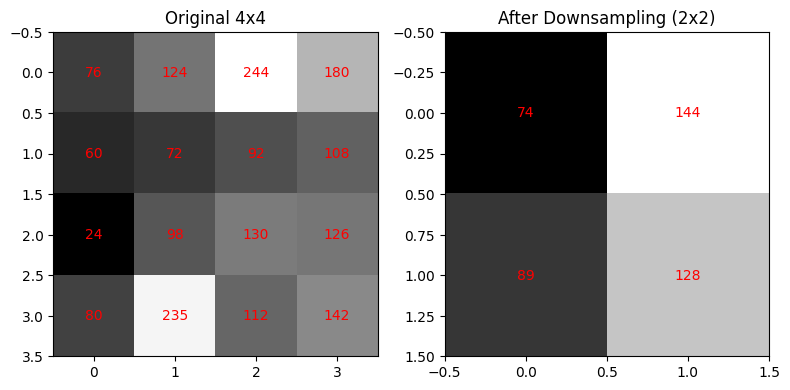

In [218]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(X4, cmap="gray", interpolation="nearest")
axs[0].set_title("Original 4x4")
for (i, j), val in np.ndenumerate(X):
    axs[0].text(j, i, int(val), ha="center", va="center", color="red")

axs[1].imshow(down_median, cmap="gray", interpolation="nearest")
axs[1].set_title("After Downsampling (2x2)")
for (i, j), val in np.ndenumerate(down_median):
    axs[1].text(j, i, int(val), ha="center", va="center", color="red")

plt.tight_layout()
plt.show()

## Downsampling dengan Median Pooling & Quantization

Pada program di bawah ini, ditunjukkan downsampling dengan median pooling yang dilanjutkan dengan quantization untuk 2-bit, 4-bit, dan 8-bit.

In [219]:
import numpy as np

def downsampling_median(img, target_h, target_w):
    '''
    Downsampling 2D untuk array 2D (grayscale) menggunakan median pooling
    - img: np.ndarray shape (height, width)
    - target_h: tinggi citra hasil downsampling
    - target_w: lebar citra hasil downsampling
    '''
    H, W = img.shape
    out = np.zeros((target_h, target_w), dtype=np.float64)

    h_block = H / target_h
    w_block = W / target_w

    for i in range(target_h):
        for j in range(target_w):
            row_start = int(i * h_block)
            row_end   = int((i + 1) * h_block)
            col_start = int(j * w_block)
            col_end   = int((j + 1) * w_block)
            patch = img[row_start:row_end, col_start:col_end]

            out[i, j] = np.round(np.median(patch))

    return out.astype(np.uint8)

def quantize_index(img, out_bit=2):
    """
    Kuantisasi gambar ke indeks level (0 .. 2^out_bit - 1)
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()
    # Normalisasi
    norm = (img - img_min) / (img_max - img_min)

    q_index = np.round(norm * (levels - 1)).astype(int)
    return np.clip(q_index, 0, levels-1)

def quantize_image_gray(img, out_bit=8):
    """
    Kuantisasi grayscale ke n-bit dengan normalisasi min-max
    - img: array (float atau int)
    - out_bit: jumlah bit (misal 2, 4, 8)

    Hasil akhir dalam bentuk nilai intensitas (0..255).
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()

    # Normalisasi ke [0,1]
    norm = (img - img_min) / (img_max - img_min)

    # Mapping ke level [0..levels-1]
    idx = np.round(norm * (levels - 1))

    # Skala balik ke [0..255]
    step = 255 / (levels - 1)
    q_img = (idx * step).astype(np.uint8)

    return q_img

In [220]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.float64)

# 1) Downsampling (mean pooling)
down_median = downsampling_median(X4, 2, 2)

# 2) Kuantisasi versi index level
down_median_q2_idx = quantize_index(down_median, out_bit=2)
down_median_q4_idx = quantize_index(down_median, out_bit=4)
down_median_q8_idx = quantize_index(down_median, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
down_median_q2 = quantize_image_gray(down_median, out_bit=2)
down_median_q4 = quantize_image_gray(down_median, out_bit=4)
down_median_q8 = quantize_image_gray(down_median, out_bit=8)

print("Hasil downsampling mean pooling:\n", down_median)
print("2-bit index (0-3):\n", down_median_q2_idx)
print("4-bit index (0-15):\n", down_median_q4_idx)
print("8-bit index (0-255):\n", down_median_q8_idx)
print("\nKuantisasi 2-bit:\n", down_median_q2)
print("\nKuantisasi 4-bit:\n", down_median_q4)
print("\nKuantisasi 8-bit:\n", down_median_q8)

Hasil downsampling mean pooling:
 [[ 74 144]
 [ 89 128]]
2-bit index (0-3):
 [[0 3]
 [1 2]]
4-bit index (0-15):
 [[ 0 15]
 [ 3 12]]
8-bit index (0-255):
 [[  0 255]
 [ 55 197]]

Kuantisasi 2-bit:
 [[  0 255]
 [ 85 170]]

Kuantisasi 4-bit:
 [[  0 255]
 [ 51 204]]

Kuantisasi 8-bit:
 [[  0 255]
 [ 55 197]]


**Visualisasi**

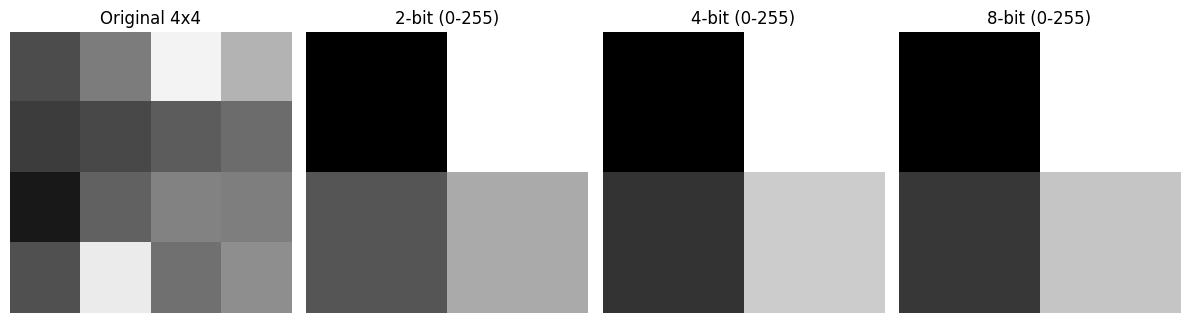

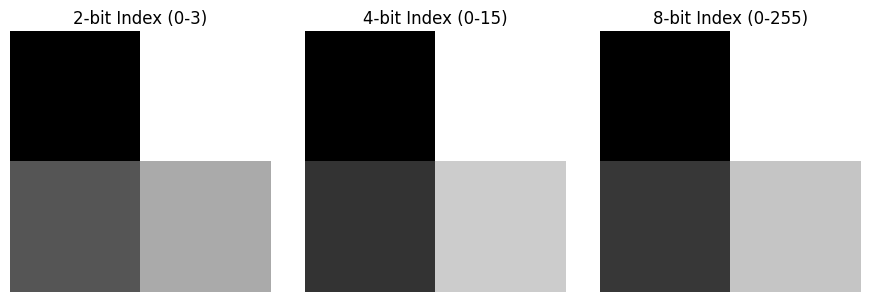

In [221]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(down_median_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(down_median_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(down_median_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(down_median_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(down_median_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(down_median_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

---

# Upsampling


Upsampling adalah proses memperbesar ukuran citra.
Ada beberapa metode yang digunakan: <sup>[1]</sup>
- Nearest Neighbor: setiap pixel diperbesar dengan cara menyalin nilainya, lalu mengisi setiap lokasi baru dengan intensitas dari tetangga terdekatnya di citra asli.
- Bilinear Interpolation: menggunakan 4 tetangga terdekat untuk mengestimasi intensitas di suatu lokasi baru tertentu.

  Untuk metode ini akan digunakan formula mapping<sup>[1]</sup> berikut:
  $$
  g_x=j\cdot \frac{W_{\text{in}}-1}{W_{\text{out}}-1}, \quad g_x=j\cdot \frac{H_{\text{in}}-1}{H_{\text{out}}-1}
  $$

- Bicubic interpolation: menggunakan 16 tetangga terdekat untuk mengestimasi intensitas dari suatu lokasi pixel baru tertentu.

  Untuk bicubic interpolation, akan digunakan implementasi pemakaian cubic kernel<sup>[2]</sup>:
  $$
  h(x) = \begin{cases}
  (a+2)|x|^3 - (a+3)|x|^2 + 1, & |x| < 1\\
  a|x|^3 - 5a|x|^2 + 8a|x| - 4a, & 1\leq |x| < 2\\
  0, & |x| \geq 2
  \end{cases}
  $$
  dengan $a=-0.5$ (Catmull-Rom spline)

Setelah ukuran citra diperbesar, nilai piksel akan dikuantisasi ke 2-bit (4 level), 4-bit (16 level) dan 8-bit (256 level).

## Nearest Neighbor Interpolation & Quantization

In [222]:
import numpy as np

def upsampling_nearest(img, new_h, new_w):
    """
    Upsampling dengan nearest neighbor
    - img: 2D array (H, W)
    - new_h: tinggi citra target
    - new_w: lebar citra target
    """
    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype=img.dtype)

    for i in range(new_h):
        for j in range(new_w):
            # mapping koordinat output -> input
            y = round(i * (h - 1) / (new_h - 1))
            x = round(j * (w - 1) / (new_w - 1))
            out[i, j] = img[y, x]
    return out

def quantize_index(img, out_bit=2):
    """
    Kuantisasi gambar ke indeks level (0 .. 2^out_bit - 1)
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()
    # Normalisasi
    norm = (img - img_min) / (img_max - img_min)

    q_index = np.round(norm * (levels - 1)).astype(int)
    return np.clip(q_index, 0, levels-1)

def quantize_image_gray(img, out_bit=8):
    """
    Kuantisasi grayscale ke n-bit dengan normalisasi min-max
    - img: array (float atau int)
    - out_bit: jumlah bit (misal 2, 4, 8)

    Hasil akhir dalam bentuk nilai intensitas (0..255).
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()

    # Normalisasi ke [0,1]
    norm = (img - img_min) / (img_max - img_min)

    # Mapping ke level [0..levels-1]
    idx = np.round(norm * (levels - 1))

    # Skala balik ke [0..255]
    step = 255 / (levels - 1)
    q_img = (idx * step).astype(np.uint8)

    return q_img

Upsampling $⟶$ Quantization

In [223]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.float64)

# 1) Upsampling dengan nearest neighbor (4x4 -> 8x8)
up_nearest = upsampling_nearest(X4, 8, 8)

# 2) Kuantisasi versi index level
up_nearest_q2_idx = quantize_index(up_nearest, out_bit=2)
up_nearest_q4_idx = quantize_index(up_nearest, out_bit=4)
up_nearest_q8_idx = quantize_index(up_nearest, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
up_nearest_q2 = quantize_image_gray(up_nearest, out_bit=2)
up_nearest_q4 = quantize_image_gray(up_nearest, out_bit=4)
up_nearest_q8 = quantize_image_gray(up_nearest, out_bit=8)

print("Hasil upsampling nearest neighbor:\n", up_nearest)
print("\n2-bit index (0-3):\n", up_nearest_q2_idx)
print("\n4-bit index (0-15):\n", up_nearest_q4_idx)
print("\n8-bit index (0-255):\n", up_nearest_q8_idx)
print("\nKuantisasi 2-bit:\n", up_nearest_q2)
print("\nKuantisasi 4-bit:\n", up_nearest_q4)
print("\nKuantisasi 8-bit:\n", up_nearest_q8)

Hasil upsampling nearest neighbor:
 [[ 76.  76. 124. 124. 244. 244. 180. 180.]
 [ 76.  76. 124. 124. 244. 244. 180. 180.]
 [ 60.  60.  72.  72.  92.  92. 108. 108.]
 [ 60.  60.  72.  72.  92.  92. 108. 108.]
 [ 24.  24.  98.  98. 130. 130. 126. 126.]
 [ 24.  24.  98.  98. 130. 130. 126. 126.]
 [ 80.  80. 235. 235. 112. 112. 142. 142.]
 [ 80.  80. 235. 235. 112. 112. 142. 142.]]

2-bit index (0-3):
 [[1 1 1 1 3 3 2 2]
 [1 1 1 1 3 3 2 2]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [1 1 3 3 1 1 2 2]
 [1 1 3 3 1 1 2 2]]

4-bit index (0-15):
 [[ 4  4  7  7 15 15 11 11]
 [ 4  4  7  7 15 15 11 11]
 [ 2  2  3  3  5  5  6  6]
 [ 2  2  3  3  5  5  6  6]
 [ 0  0  5  5  7  7  7  7]
 [ 0  0  5  5  7  7  7  7]
 [ 4  4 14 14  6  6  8  8]
 [ 4  4 14 14  6  6  8  8]]

8-bit index (0-255):
 [[ 60  60 116 116 255 255 181 181]
 [ 60  60 116 116 255 255 181 181]
 [ 42  42  56  56  79  79  97  97]
 [ 42  42  56  56  79  79  97  97]
 [  0   0  86  86 123 123 118 118]
 [  0   

**Visualisasi** Upsampling $⟶$ Quantization

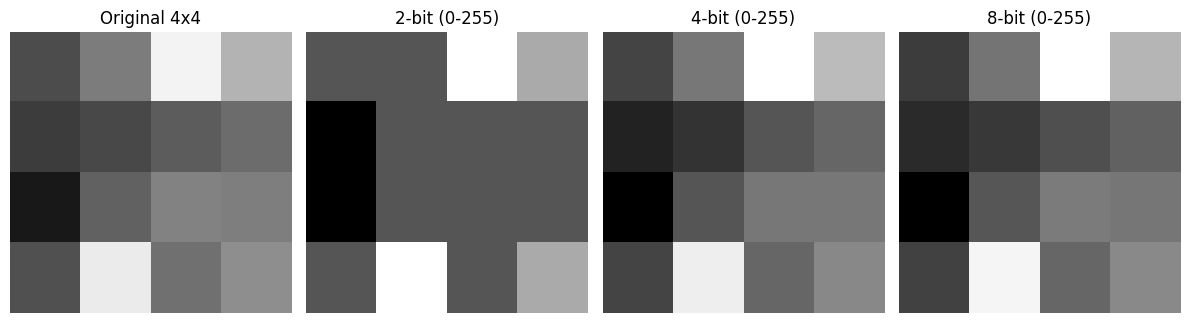

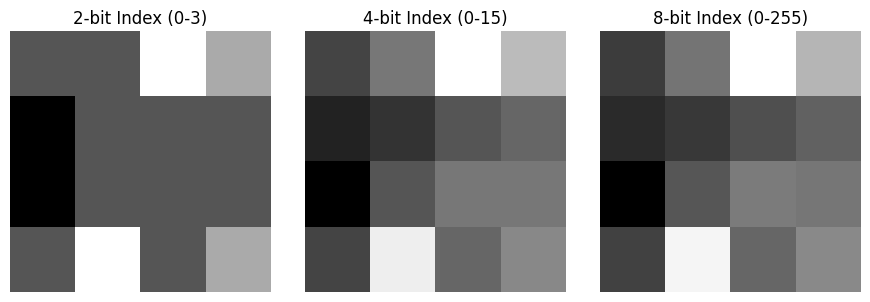

In [224]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(up_nearest_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(up_nearest_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(up_nearest_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(up_nearest_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(up_nearest_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(up_nearest_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

## Bilinear Interpolation & Quantization

In [225]:
import numpy as np

def upsampling_bilinear_gray(img, new_h, new_w):
    '''
    Upsampling dengan bilinear interpolation
    - img: 2D array (H, W)
    - new_h: tinggi citra target
    - new_w: lebar citra target
    '''
    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype=np.int32)
    for i in range(new_h):
        for j in range(new_w):
            x = j * (w - 1) / (new_w - 1)
            y = i * (h - 1) / (new_h - 1)
            x0, y0 = int(np.floor(x)), int(np.floor(y))
            x1, y1 = min(x0 + 1, w - 1), min(y0 + 1, h - 1)
            dx, dy = x - x0, y - y0
            val = (img[y0, x0] * (1 - dx) * (1 - dy) +
                   img[y0, x1] * dx * (1 - dy) +
                   img[y1, x0] * (1 - dx) * dy +
                   img[y1, x1] * dx * dy)
            out[i, j] = np.round(val)
    return out

def quantize_index(img, out_bit=2):
    """
    Kuantisasi gambar ke indeks level (0 .. 2^out_bit - 1)
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()
    # Normalisasi
    norm = (img - img_min) / (img_max - img_min)

    q_index = np.round(norm * (levels - 1)).astype(int)
    return np.clip(q_index, 0, levels-1)

def quantize_image_gray(img, out_bit=8):
    """
    Kuantisasi grayscale ke n-bit dengan normalisasi min-max
    - img: array (float atau int)
    - out_bit: jumlah bit (misal 2, 4, 8)

    Hasil akhir dalam bentuk nilai intensitas (0..255).
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()

    # Normalisasi ke [0,1]
    norm = (img - img_min) / (img_max - img_min)

    # Mapping ke level [0..levels-1]
    idx = np.round(norm * (levels - 1))

    # Skala balik ke [0..255]
    step = 255 / (levels - 1)
    q_img = (idx * step).astype(np.uint8)

    return q_img

Upsampling $⟶$ Quantization

In [226]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.float64)

# 1) Upsampling dengan bilinear interpolation (4x4 -> 8x8)
up_bilinear = upsampling_bilinear_gray(X4, 8, 8)

# 2) Kuantisasi versi index level
up_bilinear_q2_idx = quantize_index(up_bilinear, out_bit=2)
up_bilinear_q4_idx = quantize_index(up_bilinear, out_bit=4)
up_bilinear_q8_idx = quantize_index(up_bilinear, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
up_bilinear_q2 = quantize_image_gray(up_bilinear, out_bit=2)
up_bilinear_q4 = quantize_image_gray(up_bilinear, out_bit=4)
up_bilinear_q8 = quantize_image_gray(up_bilinear, out_bit=8)

print("Hasil upsampling bilinear interpolation:\n", up_bilinear)
print("\n2-bit index (0-3):\n", up_bilinear_q2_idx)
print("\n4-bit index (0-15):\n", up_bilinear_q4_idx)
print("\n8-bit index (0-255):\n", up_bilinear_q8_idx)
print("\nKuantisasi 2-bit:\n", up_bilinear_q2)
print("\nKuantisasi 4-bit:\n", up_bilinear_q4)
print("\nKuantisasi 8-bit:\n", up_bilinear_q8)

Hasil upsampling bilinear interpolation:
 [[ 76  97 117 158 210 235 207 180]
 [ 69  83  97 124 157 175 162 149]
 [ 62  70  77  89 104 114 116 118]
 [ 50  62  75  86  96 104 109 113]
 [ 34  58  83  99 111 119 120 121]
 [ 32  69 105 120 125 128 128 128]
 [ 56 108 159 160 136 122 129 135]
 [ 80 146 213 200 147 116 129 142]]

2-bit index (0-3):
 [[1 1 1 2 3 3 3 2]
 [1 1 1 1 2 2 2 2]
 [0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 2 2 2 1 1 2]
 [1 2 3 2 2 1 1 2]]

4-bit index (0-15):
 [[ 3  5  6  9 13 15 13 11]
 [ 3  4  5  7  9 11 10  9]
 [ 2  3  3  4  5  6  6  6]
 [ 1  2  3  4  5  5  6  6]
 [ 0  2  4  5  6  6  7  7]
 [ 0  3  5  7  7  7  7  7]
 [ 2  6  9  9  8  7  7  8]
 [ 4  8 13 12  8  6  7  8]]

8-bit index (0-255):
 [[ 55  82 107 158 224 255 220 186]
 [ 46  64  82 116 157 180 163 147]
 [ 38  48  57  72  90 103 106 108]
 [ 23  38  54  68  80  90  97 102]
 [  3  33  64  84  99 109 111 112]
 [  0  46  92 111 117 121 121 121]
 [ 30  95 160 161 131 113 122 1

**Visualisasi** Upsampling $⟶$ Quantization

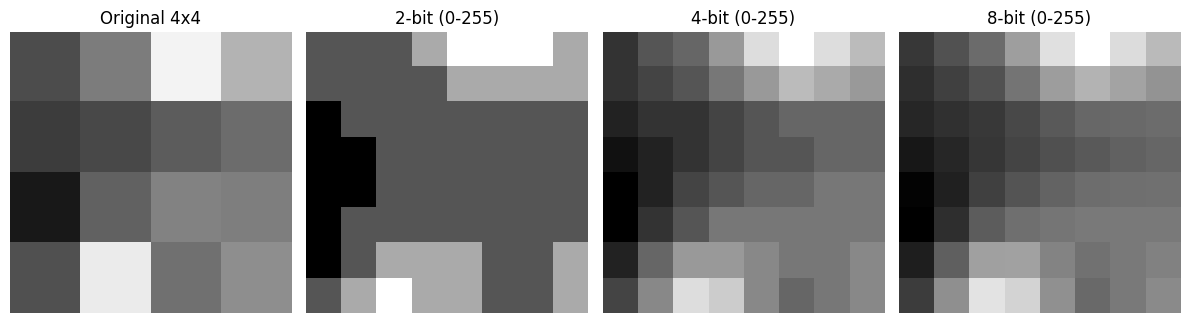

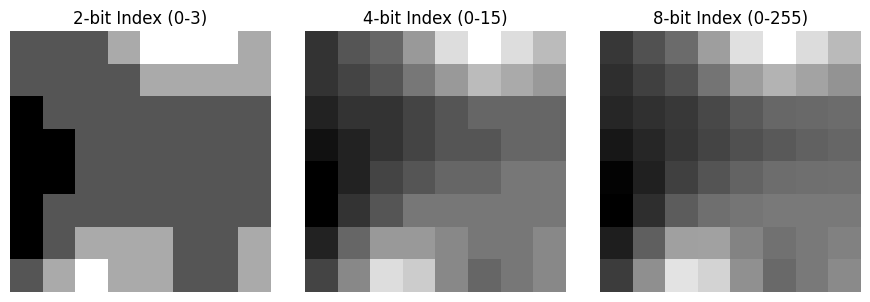

In [227]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(up_bilinear_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(up_bilinear_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(up_bilinear_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(up_bilinear_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(up_bilinear_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(up_bilinear_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

## Bicubic Interpolation & Quantization

In [228]:
import numpy as np

# Bicubic helper
def cubic_kernel(x, a=-0.5):
    x = abs(x)
    if x < 1:
        return (a+2)*x**3 - (a+3)*x**2 + 1
    elif x < 2:
        return a*x**3 - 5*a*x**2 + 8*a*x - 4*a
    return 0

def upsampling_bicubic_gray(img, new_h, new_w, a=-0.5):
    H, W = img.shape
    out = np.zeros((new_h, new_w), dtype=np.float64)
    for i in range(new_h):
        for j in range(new_w):
            x = j * (W - 1) / (new_w - 1)
            y = i * (H - 1) / (new_h - 1)
            x0, y0 = int(np.floor(x)), int(np.floor(y))
            dx, dy = x - x0, y - y0
            val = 0.0
            for m in range(-1, 3):
                for n in range(-1, 3):
                    xm, yn = np.clip(x0+m, 0, W-1), np.clip(y0+n, 0, H-1)
                    wx, wy = cubic_kernel(m-dx, a), cubic_kernel(dy-n, a)
                    val += img[yn, xm] * wx * wy
            out[i, j] = np.round(val)
    return out

def quantize_index(img, out_bit=2):
    """
    Kuantisasi gambar ke indeks level (0 .. 2^out_bit - 1)
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()
    # Normalisasi
    norm = (img - img_min) / (img_max - img_min)

    q_index = np.round(norm * (levels - 1)).astype(int)
    return np.clip(q_index, 0, levels-1)

def quantize_image_gray(img, out_bit=8):
    """
    Kuantisasi grayscale ke n-bit dengan normalisasi min-max
    - img: array (float atau int)
    - out_bit: jumlah bit (misal 2, 4, 8)

    Hasil akhir dalam bentuk nilai intensitas (0..255).
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()

    # Normalisasi ke [0,1]
    norm = (img - img_min) / (img_max - img_min)

    # Mapping ke level [0..levels-1]
    idx = np.round(norm * (levels - 1))

    # Skala balik ke [0..255]
    step = 255 / (levels - 1)
    q_img = (idx * step).astype(np.uint8)

    return q_img

Upsampling $⟶$ Quantization

In [229]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.float64)

# 1) Upsampling dengan bicubic interpolation (4x4 -> 8x8)
up_bicubic = upsampling_bicubic_gray(X4, 8, 8)

# 2) Kuantisasi versi index level
up_bicubic_q2_idx = quantize_index(up_bicubic, out_bit=2)
up_bicubic_q4_idx = quantize_index(up_bicubic, out_bit=4)
up_bicubic_q8_idx = quantize_index(up_bicubic, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
up_bicubic_q2 = quantize_image_gray(up_bicubic, out_bit=2)
up_bicubic_q4 = quantize_image_gray(up_bicubic, out_bit=4)
up_bicubic_q8 = quantize_image_gray(up_bicubic, out_bit=8)

print("Hasil upsampling bicubic interpolation:\n", up_bicubic)
print("\n2-bit index (0-3):\n", up_bicubic_q2_idx)
print("\n4-bit index (0-15):\n", up_bicubic_q4_idx)
print("\n8-bit index (0-255):\n", up_bicubic_q8_idx)
print("\nKuantisasi 2-bit:\n", up_bicubic_q2)
print("\nKuantisasi 4-bit:\n", up_bicubic_q4)
print("\nKuantisasi 8-bit:\n", up_bicubic_q8)

Hasil upsampling bicubic interpolation:
 [[ 76.  89. 113. 158. 221. 244. 213. 180.]
 [ 71.  80.  94. 123. 164. 181. 166. 149.]
 [ 63.  67.  73.  84.  98. 108. 112. 114.]
 [ 48.  56.  67.  77.  85.  93. 101. 107.]
 [ 28.  48.  73.  93. 110. 120. 120. 118.]
 [ 28.  62. 104. 123. 129. 131. 130. 129.]
 [ 55. 110. 171. 175. 138. 120. 127. 136.]
 [ 80. 150. 226. 216. 144. 109. 123. 142.]]

2-bit index (0-3):
 [[1 1 1 2 3 3 3 2]
 [1 1 1 1 2 2 2 2]
 [0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 1 2 2 2 1 1 2]
 [1 2 3 3 2 1 1 2]]

4-bit index (0-15):
 [[ 3  4  6  9 13 15 13 11]
 [ 3  4  5  7  9 11 10  8]
 [ 2  3  3  4  5  6  6  6]
 [ 1  2  3  3  4  5  5  5]
 [ 0  1  3  5  6  6  6  6]
 [ 0  2  5  7  7  7  7  7]
 [ 2  6 10 10  8  6  7  8]
 [ 4  8 14 13  8  6  7  8]]

8-bit index (0-255):
 [[ 57  72 100 153 228 255 218 179]
 [ 51  61  78 112 161 181 163 143]
 [ 41  46  53  66  83  94  99 102]
 [ 24  33  46  58  67  77  86  93]
 [  0  24  53  77  97 109 109 106]
 [ 

**Visualisasi** Upsampling $⟶$ Quantization

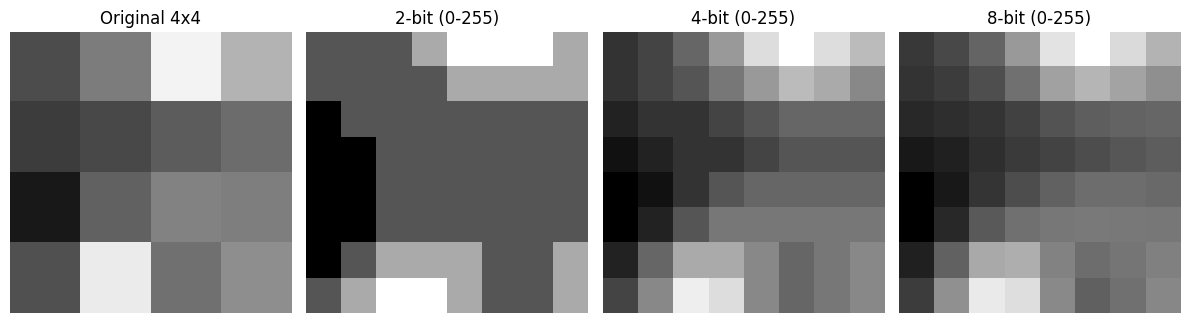

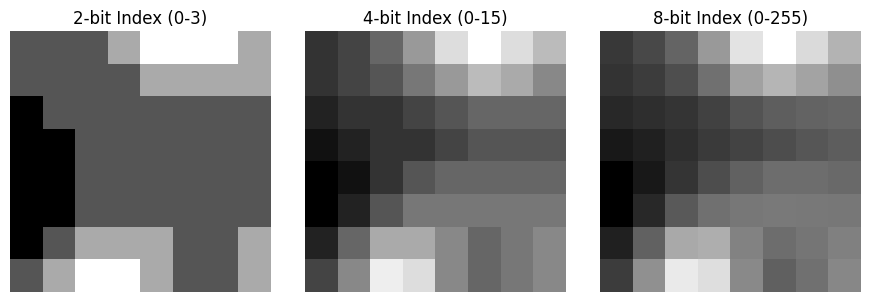

In [230]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(up_bicubic_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(up_bicubic_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(up_bicubic_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(up_bicubic_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(up_bicubic_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(up_bicubic_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

# Contoh lain upsampling (tugas di kelas)

Quantization $⟶$ Upsampling

In [231]:
X3 = np.array([
    [600, 700, 100],
    [30,  240, 500],
    [310,  470, 190]
], dtype=np.float64)

# 1) Kuantisasi versi index level
quantized_x3_q2 = quantize_index(X3, out_bit=2)
quantized_x3_q4 = quantize_index(X3, out_bit=4)
quantized_x3_q8 = quantize_index(X3, out_bit=8)

# 2) Upsampling 3x3 -> 5x5
up_nearest_x3 = upsampling_nearest(quantized_x3_q2, 5, 5)
up_bilinear_x3 = upsampling_bilinear_gray(quantized_x3_q2, 5, 5)
up_bicubic_x3 = upsampling_bicubic_gray(quantized_x3_q2, 5, 5)

print("Hasil quantisasi ke 2-bit:\n", quantized_x3_q2)
print("Hasil quantisasi ke 4-bit:\n", quantized_x3_q4)
print("Hasil quantisasi ke 8-bit:\n", quantized_x3_q8)

print("\nHasil upsampling nearest neighbor:\n", up_nearest_x3)
print("\nHasil upsampling bilinear interpolation:\n", up_bilinear_x3)
print("\nHasil upsampling bicubic interpolation:\n", up_bicubic_x3)

Hasil quantisasi ke 2-bit:
 [[3 3 0]
 [0 1 2]
 [1 2 1]]
Hasil quantisasi ke 4-bit:
 [[13 15  2]
 [ 0  5 11]
 [ 6 10  4]]
Hasil quantisasi ke 8-bit:
 [[217 255  27]
 [  0  80 179]
 [107 167  61]]

Hasil upsampling nearest neighbor:
 [[3 3 3 0 0]
 [3 3 3 0 0]
 [0 0 1 2 2]
 [1 1 2 1 1]
 [1 1 2 1 1]]

Hasil upsampling bilinear interpolation:
 [[3 3 3 2 0]
 [2 2 2 2 1]
 [0 0 1 2 2]
 [0 1 2 2 2]
 [1 2 2 2 1]]

Hasil upsampling bicubic interpolation:
 [[3. 3. 3. 2. 0.]
 [1. 2. 2. 2. 1.]
 [0. 0. 1. 2. 2.]
 [0. 1. 1. 2. 2.]
 [1. 2. 2. 2. 1.]]


# Referensi

1. Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Prentice Hall.
2. Keys, R. G. (1981). Cubic convolution interpolation for digital image processing. IEEE Transactions on Acoustics, Speech, and Signal Processing, 29(6), 1153–1160.